# Importing Libraries

In [1]:
import numpy as np
import tensorflow
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

# Data Preprocessing

In [2]:
os.listdir('Dataset')

['Test', 'Train', 'Val']

In [3]:
IMAGE_SIZE = [128, 128]

train_path = 'Dataset/Train'
val_path = 'Dataset/Val'
test_path='Dataset/Test'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range= 0.2,
                                    zoom_range= 0.2,
                                    horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                target_size = (128, 128),
                                                batch_size= 32,
                                                class_mode = 'categorical')

val_set= train_datagen.flow_from_directory('Dataset/Val',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode= 'categorical')

test_set= train_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


# Model Building

In [5]:
base_model = VGG16(input_shape = (128, 128, 3), weights = 'imagenet', include_top = False)

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
inp = base_model.input

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)

output = Dense(2, activation = 'softmax')(x)

model = Model(inputs = inp, outputs = output)


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [9]:
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']
)

In [10]:
history = model.fit(
    training_set, 
    batch_size = 32, 
    verbose = 1, 
    epochs = 5, 
    validation_data = (val_set)
)

Epoch 1/5
114/114 [==============================] - 206s 2s/step - loss: 0.1712 - accuracy: 0.9552 - val_loss: 0.0539 - val_accuracy: 0.9846
Epoch 2/5
114/114 [==============================] - 182s 2s/step - loss: 0.0620 - accuracy: 0.9816 - val_loss: 0.0774 - val_accuracy: 0.9802
Epoch 3/5
114/114 [==============================] - 183s 2s/step - loss: 0.0592 - accuracy: 0.9810 - val_loss: 0.0513 - val_accuracy: 0.9868
Epoch 4/5
114/114 [==============================] - 181s 2s/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0524 - val_accuracy: 0.9824
Epoch 5/5
114/114 [==============================] - 185s 2s/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0749 - val_accuracy: 0.9868


In [11]:
print("Evaluate on Test Data")
results = model.evaluate(test_set, batch_size = 32)
print("test loss, test acc: ", results)

Evaluate on Test Data
15/15 [==============================] - 30s 2s/step - loss: 0.0434 - accuracy: 0.9802
test loss, test acc:  [0.04337374493479729, 0.9802197813987732]


In [12]:
model.save("model.h5")

# Plotting

In [13]:
history.history

{'loss': [0.17122076451778412,
  0.06200495362281799,
  0.0591675341129303,
  0.03678325191140175,
  0.036464545875787735],
 'accuracy': [0.9552320837974548,
  0.981598436832428,
  0.9810491800308228,
  0.9884647130966187,
  0.9887393712997437],
 'val_loss': [0.0538538359105587,
  0.07735590636730194,
  0.051296379417181015,
  0.05242243409156799,
  0.07489226758480072],
 'val_accuracy': [0.9846153855323792,
  0.9802197813987732,
  0.9868131875991821,
  0.9824175834655762,
  0.9868131875991821]}

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [15]:
def plot(history):
    fig, axes = plt.subplots(1, 2, figsize = (10, 4))
    axes[0].plot(history["loss"], "r-", history["val_loss"], "b-", linewidth = 0.5)
    axes[0].set_title("Loss Curve")
    axes[1].plot(history["accuracy"], "r-", history["val_accuracy"], "b-", linewidth = 0.5)
    axes[1].set_title("Accuracy Curve")
    fig.tight_layout()
    fig.show()

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_10308/189057936.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


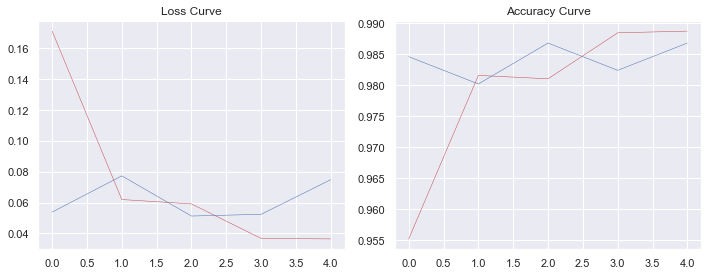

In [16]:
plot(history.history)

# Predictions


In [17]:
import cv2 as cv

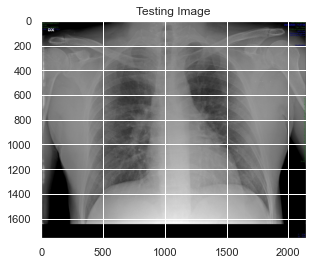

In [18]:
img = cv.imread('Test/COVID-19 (1154).jpg')
plt.imshow(img)
plt.title("Testing Image")
plt.show()

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [20]:
mymodel = load_model('model.h5')

In [21]:
mymodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [22]:
img = image.load_img(r'C:\Users\MY PC\Test\COVID-19 (1154).jpg', target_size = (128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
classes = mymodel.predict(img_data)
result = int(classes[0][0])

In [23]:
if result == 1:
    print("Person is Affected By Covid")
else :
    print("Result is Normal")

Person is Affected By Covid


# Confusion Matrix

In [24]:
test_set= train_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 455 images belonging to 2 classes.


In [25]:
Y_pred = np.argmax(mymodel.predict_generator(test_set), axis = 1)

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_10308/876508757.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(mymodel.predict_generator(test_set), axis = 1)


In [26]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
Y_test = test_set.classes
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[121   7]
 [  0 327]]


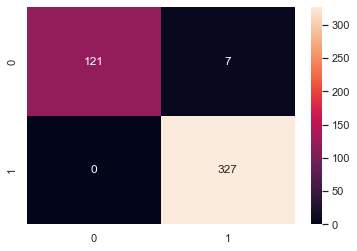

In [30]:
cm = sns.heatmap(cm, annot=True, fmt="d")

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(Y_test, Y_pred, target_names = ["COVID-19", "Normal"]))

              precision    recall  f1-score   support

    COVID-19       1.00      0.95      0.97       128
      Normal       0.98      1.00      0.99       327

    accuracy                           0.98       455
   macro avg       0.99      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



# ROC - AUC

In [33]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

ROC AUC score: 0.97265625


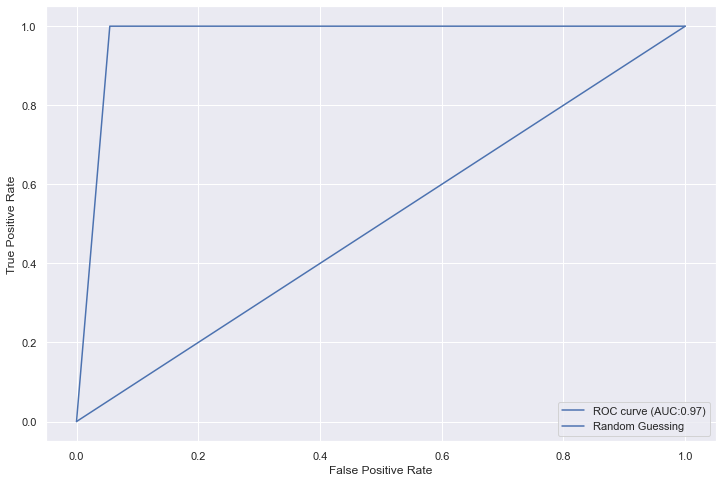

In [36]:
target=["ROC curve"]

#set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

#function for scoring roc auc score for roc
def roc(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label= 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average = average)

print('ROC AUC score:', roc(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()